# **GEMASTIK DATA MINING - Tim PendatangBaru**
## **Analisis Sentimen Menggunakan LSTM**
### **Anggota:**
1. Alifia Shafira (1301194102)
2. Muhammad Alfi Syahri Nasution (1301190326)
3. Shadifa Auliatama Harjanto (1301194220)


## **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

##**Load Dataset**

In [ ]:
df = pd.read_csv("dataset.csv")
df.shape

(10806, 2)

In [ ]:
df.head(6)

,sentimen,Tweet
0,0,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...
1,0,kita lanjutkan saja diam ini hingga kau dan ak...
2,1,doa rezeki tak putus inna haa zaa larizquna ma...
3,1,makasih loh ntar kita bagi hasil aku 99 9 sisa...
4,0,aku tak faham betul jenis orang malaysia yang ...
6,0,cerita dia macam ni mamat ni hari2 aku nampak ...


In [ ]:
data_awal = df.head(6)
filepath ='data_awal.csv'
data_awal.to_csv(filepath, index=False)

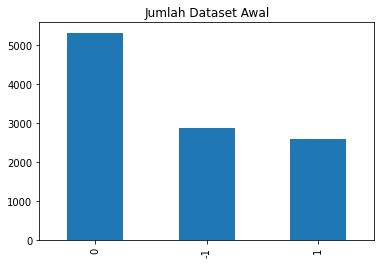

In [ ]:
df['sentimen'].value_counts().plot(kind='bar',
                                   title='Jumlah Dataset Awal',
                                   x='Label',
                                   y='Jumlah')

##**Data Preprocessing**

In [ ]:
df['Tweet'] = df['Tweet'].apply(lambda x: x.lower())
# removing special chars
df['Tweet'] = df['Tweet'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df['Tweet'] = df['Tweet'].apply((lambda x: re.sub('rt','',x)))
df['Tweet'] = df['Tweet'].apply((lambda x: re.sub('^\s+|\s+$','',x)))
df.drop(df.index[df['sentimen'] == 0], inplace = True)
df['sentimen'] = df['sentimen'].replace(-1, 0)
#
df.head(6)

,sentimen,Tweet
0,0,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...
1,0,kita lanjutkan saja diam ini hingga kau dan ak...
2,1,doa rezeki tak putus inna haa zaa larizquna ma...
3,1,makasih loh ntar kita bagi hasil aku 99 9 sisa...
4,0,aku tak faham betul jenis orang malaysia yang ...
6,0,cerita dia macam ni mamat ni hari2 aku nampak ...


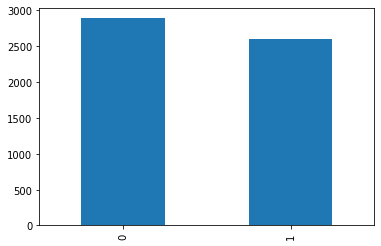

In [ ]:
#Grafik setelah label 'Netral' dihapus
df['sentimen'].value_counts().plot(kind='bar')

In [ ]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['Tweet'].values)
X = tokenizer.texts_to_sequences(df['Tweet'].values)
X = pad_sequences(X)
X[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  631,  990,   15,    3,
           1, 1733,   17],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    4,  103,  246,   11,  670,   20,    5,    1, 1734,   25,
          53,   61,   49]], dtype=int32)

##**Model**

In [ ]:
#Hyperparameter
lstm_unit = 64
batch_size = 256
epoch = 10


model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_unit, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 128)           256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 25, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 2)                 130       
Total params: 305,538
Trainable params: 305,538
Non-trainable params: 0
_________________________________________________________________
None


##**Data Split**

In [ ]:
Y = pd.get_dummies(df['sentimen']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4383, 25) (4383, 2)
(1096, 25) (1096, 2)


##**Model Train**

In [ ]:
model.fit(X_train, 
          Y_train, 
          epochs = epoch, 
          batch_size=batch_size,
          validation_data=(X_test, Y_test), 
          verbose = 1)

Epoch 1/10
18/18 [==============================] - 31s 238ms/step - loss: 0.6916 - accuracy: 0.5219 - val_loss: 0.6793 - val_accuracy: 0.5903
Epoch 2/10
18/18 [==============================] - 3s 148ms/step - loss: 0.6619 - accuracy: 0.6373 - val_loss: 0.6259 - val_accuracy: 0.6597
Epoch 3/10
18/18 [==============================] - 3s 147ms/step - loss: 0.5700 - accuracy: 0.7098 - val_loss: 0.5786 - val_accuracy: 0.7035
Epoch 4/10
18/18 [==============================] - 3s 147ms/step - loss: 0.4679 - accuracy: 0.7851 - val_loss: 0.5713 - val_accuracy: 0.7318
Epoch 5/10
18/18 [==============================] - 3s 149ms/step - loss: 0.3817 - accuracy: 0.8334 - val_loss: 0.5858 - val_accuracy: 0.7354
Epoch 6/10
18/18 [==============================] - 3s 146ms/step - loss: 0.3311 - accuracy: 0.8657 - val_loss: 0.6343 - val_accuracy: 0.7345
Epoch 7/10
18/18 [==============================] - 3s 150ms/step - loss: 0.3055 - accuracy: 0.8721 - val_loss: 0.6780 - val_accuracy: 0.7245
Epoch

##**Hasil Prediksi**

In [ ]:
#twt = ['Kapolri Ingin Distribusi Bantuan Warga Terdampak PPKM Darurat Dipercepat'] #Masukin kalimat secara manual buat ngecek
def testing(twt):
  #twt = ['mau beli pencil alis taunya ppkm gajadi lagi']
  #vectorizing the tweet by the pre-fitted tokenizer instance
  twt = tokenizer.texts_to_sequences(twt)
  #padding the tweet to have exactly the same shape as `embedding_2` input
  twt = pad_sequences(twt, maxlen=64, dtype='int32', value=0)
  #print(twt)
  sentiment = model.predict(twt,batch_size=1,verbose = 1)[0]
  if(np.argmax(sentiment) == 0):
      #print("negative")
      return "Negatif"
  elif (np.argmax(sentiment) == 1):
      #print("positive")
      return "Positif"
#testing(twt)

###**PSBB Transisi**

In [ ]:
df_transisi = pd.read_csv('psbb_transisi.csv')
df_transisi.head(10)
df_transisi = df_transisi.drop(df_transisi.iloc[:, :10], inplace = False, axis = 1)
df_transisi = df_transisi.drop(df_transisi.iloc[:, 1:], inplace = False, axis = 1)

df_transisi['tweet'] = df_transisi['tweet'].apply(lambda x: x.lower())
df_transisi['tweet'] = df_transisi['tweet'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df_transisi['tweet'] = df_transisi['tweet'].apply((lambda x: re.sub('rt','',x)))
df_transisi['tweet'] = df_transisi['tweet'].apply((lambda x: re.sub('^\s+|\s+$','',x)))
df_transisi.head()


,tweet
0,pergub baru anies motor pribadi kena ganjil ge...
1,padahal transpoasi umum fav gue bgt sebelum co...
2,kompastv dari berita udh banyak sekali para p...
3,pergub baru anies motor pribadi kena ganjil ge...
4,psbb ini bakal berakhir bentar lagi gatau mau ...


In [ ]:
label = []
print(len(df_transisi['tweet']))
for item in range(len(df_transisi['tweet'])):
  label.append(testing(df_transisi['tweet'][item]))
label
df_transisi['Label'] = pd.Series(label, index=df_transisi.index)

100
89/89 [==============================] - 1s 8ms/step


In [ ]:
df_transisi.sample(5)

,tweet,Label
28,selama periode 14 september hingga 4 oktober 2...,Negatif
70,lockdown in scale lockdown ie italia malaysi...,Negatif
55,psbb psbb transisi psbb jilid ii psbb mini loc...,Positif
23,pergub baru anies motor pribadi kena ganjil ge...,Positif
82,pergub baru anies motor pribadi kena ganjil ge...,Positif


In [ ]:
hasil_transisi = df_transisi.sample(5)
hasil_transisi =pd.DataFrame(hasil_transisi)
print(hasil_transisi)


                                                tweet    Label
7   pergub baru anies motor pribadi kena ganjil ge...  Positif
87  dr tia  vaksin bukan obat pa  psbb covid19 cor...  Negatif
4   psbb ini bakal berakhir bentar lagi gatau mau ...  Positif
85  daripada memperbanyak terminologi program sepe...  Negatif
96  kompastv mana buktinya  gak ada bedanya sama p...  Positif


In [ ]:
filepath ='hasil_transisi.csv'
hasil_transisi.to_csv(filepath, index=False)

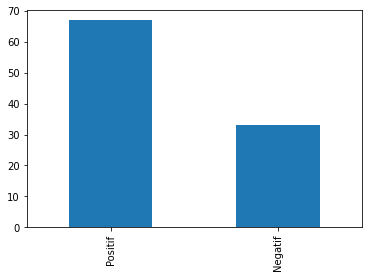

In [ ]:
df_transisi['Label'].value_counts().plot(kind='bar')

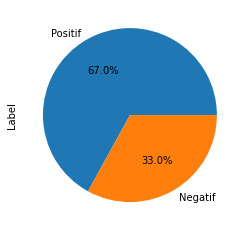

In [ ]:
df_transisi['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')

###**PSBB Total**

In [ ]:
df_total = pd.read_csv('psbb_total.csv')
df_total = df_total = df_total.drop(df_total.iloc[:, :10], inplace = False, axis = 1)
df_total = df_total.drop(df_total.iloc[:, 1:], inplace = False, axis = 1)

df_total['tweet'] = df_total['tweet'].apply(lambda x: x.lower())
df_total['tweet'] = df_total['tweet'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df_total['tweet'] = df_total['tweet'].apply((lambda x: re.sub('rt','',x)))
df_total['tweet'] = df_total['tweet'].apply((lambda x: re.sub('^\s+|\s+$','',x)))
df_total.head()

,tweet
0,asli deh salut sm pemerintah korea yang penang...
1,klo klasternya ga berkurang bakal di psbb total
2,total pelanggar operasi yustisi psbb transisi ...
3,pas baru bgt ada psbb dan itu total akses kelu...
4,bener abis psbb total peama kemarin terus naik...


In [ ]:
label = []
print(len(df_total['tweet']))
for item in range(len(df_total['tweet'])):
  label.append(testing(df_total['tweet'][item]))
label
df_total['Label'] = pd.Series(label, index=df_total.index)

54
103/103 [==============================] - 1s 8ms/step


In [ ]:
df_total.sample(5)

,tweet,Label
39,then whats your story tell me on monday ok g...,Positif
48,reiza_patters fuck lah buat si botak depanbela...,Positif
40,agusyudhoyono caranya biar saya dapet sumbanga...,Negatif
44,ah bisa2an aje media biar di lakuin psbb total...,Negatif
45,mana yang betul et beberapa teman japri men...,Positif


In [ ]:
hasil_total = df_total.sample(5)
hasil_total =pd.DataFrame(hasil_total)
print(hasil_total)


                                                tweet    Label
26  prasetyoedi_ psbb total bikin susah usahawan a...  Positif
22  meusaeternus kemaren waktu psbb total berlaku ...  Positif
3   pas baru bgt ada psbb dan itu total akses kelu...  Positif
8   demo uu ciptaker kan sampai 28 oktbr sesudah 9...  Negatif
25  abouttng kalo alasannya revitalisasi masyaraka...  Negatif


In [ ]:
filepath ='hasil_total.csv'
hasil_total.to_csv(filepath, index=False)

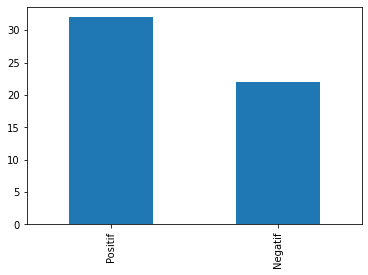

In [ ]:
df_total['Label'].value_counts().plot(kind='bar')

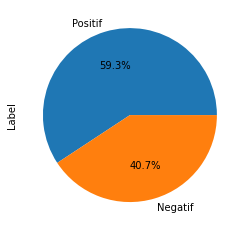

In [ ]:
df_total['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')

###**PPKM Mikro**

In [ ]:
df_mikro = pd.read_csv("ppkm_mikro.csv")
df_mikro = df_mikro.drop(df_mikro.iloc[:, :10], inplace = False, axis = 1)
df_mikro = df_mikro.drop(df_mikro.iloc[:, 1:], inplace = False, axis = 1)

df_mikro['tweet'] = df_mikro['tweet'].apply(lambda x: x.lower())
df_mikro['tweet'] = df_mikro['tweet'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df_mikro['tweet'] = df_mikro['tweet'].apply((lambda x: re.sub('rt','',x)))
df_mikro['tweet'] = df_mikro['tweet'].apply((lambda x: re.sub('^\s+|\s+$','',x)))
df_mikro.head()

,tweet
0,pemerintah memutuskan memperpanjang ppkm mikro...
1,ppkm mikro jilid ii peritel minta jam operasi...
2,pastikan pelaksanaan ppkm mikro bupati sidak k...
3,yuk dukung pelaksanaan pembatasan kegiatan mas...
4,kembali operasi aman nusa ii edukasi masyaraka...


In [ ]:
label = []
print(len(df_mikro['tweet']))
for item in range(len(df_mikro['tweet'])):
  label.append(testing(df_mikro['tweet'][item]))
label
df_mikro['Label'] = pd.Series(label, index=df_mikro.index)

195
60/60 [==============================] - 1s 8ms/step


In [ ]:
df_mikro.sample(5)

,tweet,Label
70,ppkm mikro kabarnya di perpanjang fix belum ne...,Positif
76,pemkot klaim ppkm skala mikro turunkan kasus c...,Positif
126,wujudkan kedisiplinan warga dalam melaksanakan...,Negatif
146,gubernur khofifah indar parawansa mengatakan a...,Negatif
5,pemerintah perpanjang ppkm skala mikro di jawa...,Positif


In [ ]:
hasil_mikro = df_mikro.sample(5)
hasil_mikro =pd.DataFrame(hasil_mikro)
print(hasil_mikro)


                                                 tweet    Label
97   ops yustisi protokol kesehatan dipimpin kspkt ...  Positif
187  gubernur khofifah pastikan ppkm mikro diperpan...  Negatif
130  colomadusenin tanggal 22 pebruari 2021 seu sug...  Negatif
189  pantesan ppkm mikro diklaim berhasil oleh joko...  Positif
162  kelurahan songgokeo pionir ppkm mikro kota bat...  Positif


In [ ]:
filepath ='hasil_mikro.csv'
hasil_mikro.to_csv(filepath, index=False)

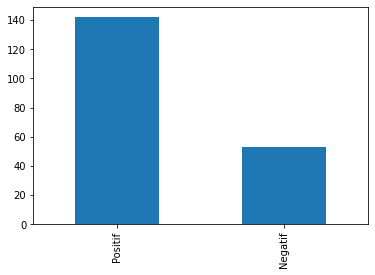

In [ ]:
df_mikro['Label'].value_counts().plot(kind='bar')

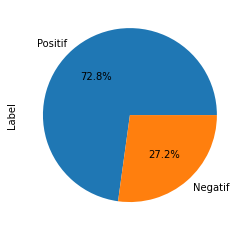

In [ ]:
df_mikro['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')

###**PPKM Darurat**

In [ ]:
df_darurat = pd.read_csv("ppkm_darurat.csv")
df_darurat = df_darurat.drop(df_darurat.iloc[:, :10], inplace = False, axis = 1)
df_darurat = df_darurat.drop(df_darurat.iloc[:, 1:], inplace = False, axis = 1)

df_darurat['tweet'] = df_darurat['tweet'].apply(lambda x: x.lower())
df_darurat['tweet'] = df_darurat['tweet'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df_darurat['tweet'] = df_darurat['tweet'].apply((lambda x: re.sub('rt','',x)))
df_darurat['tweet'] = df_darurat['tweet'].apply((lambda x: re.sub('^\s+|\s+$','',x)))
df_darurat.head()

,tweet
0,jepnchl itu la ppkm
1,sundingjalila ppkm terus ya
2,vaksinperkuatimunitas ppkm cegah penyebaran
3,ppkm peemuanperkenalankhitbahmenikah sungguh n...
4,mau beli pencil alis taunya ppkm gajadi lagi


In [ ]:
label = []
print(len(df_darurat['tweet']))
for item in range(len(df_darurat['tweet'])):
  label.append(testing(df_darurat['tweet'][item]))
label
df_darurat['Label'] = pd.Series(label, index=df_darurat.index)

100
30/30 [==============================] - 0s 9ms/step


In [ ]:
df_darurat.sample(5)

,tweet,Label
98,revanheryan08 ududusx bangunjam6pagi afiffuads...,Positif
72,kabar ppkm diperpanjang sampai tanggal 2 agust...,Positif
78,kerja kerja kerja gk kerja gaada duit gaada du...,Positif
40,dausgonia yak benar haha sehat2 bro nasgor tia...,Negatif
43,apel ppkm httpstcodt56nh4dkx,Negatif


In [ ]:
hasil_darurat = df_darurat.sample(5)
hasil_darurat =pd.DataFrame(hasil_darurat)
print(hasil_darurat)


                                                tweet    Label
22  dennysiregar7 itu siasat kadrun aja buat lockd...  Negatif
66        vaksinperkuatimunitas ppkm cegah penyebaran  Positif
33  ltrfess yok pengen staycation gitu bosen kerja...  Negatif
35        vaksinperkuatimunitas ppkm cegah penyebaran  Positif
77              ppkm  pelan pelan kamu menjauh   yhaa  Positif


In [ ]:
filepath ='hasil_darurat.csv'
hasil_darurat.to_csv(filepath, index=False)

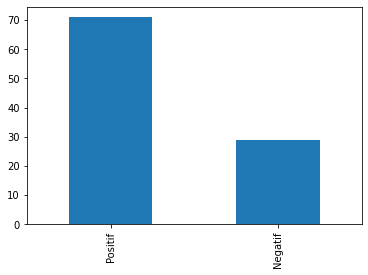

In [ ]:
df_darurat['Label'].value_counts().plot(kind='bar')

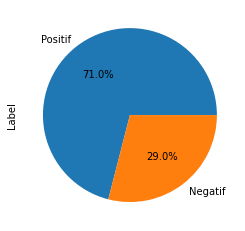

In [ ]:
df_darurat['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')